# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [48]:
import pandas as pd    # for data manipulation
import numpy as np     # for numerical operations
import matplotlib.pyplot as plt    # for plotting
import seaborn as sns  # for more advanced visualizations

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [49]:
df_temp = pd.read_csv(r"C:\DSML bootcamp\Week4\Day1\lab-descriptive-stats-en\your-code\Temp_States.csv")

#### Print `temp`

In [50]:
print(df_temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [51]:
df_temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [52]:
# Create a new DataFrame 'new_york_df' by filtering rows in df_temp
# The condition df_temp['State'] == 'New York' selects only rows where the 'State' column has the value 'New York'
new_york_df = df_temp[df_temp['State'] == 'New York']

new_york_df

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [54]:
# Calculate the mean (average) of the 'Temperature' column in the new_york_df DataFrame
average_temp = new_york_df['Temperature'].mean()

# The {:.2f} inside the f-string formats the number to 2 decimal places
print(f"The average Temperature of cities in New York is: {average_temp:.2f} degrees.")


The average Temperature of cities in New York is: 10.74 degrees.


#### We want to know cities and states with Temperature above 15 degress Celcius

In [55]:
# Filter the DataFrame to include only rows where the 'Temperature' column is greater than 15
cities_above_15 = df_temp[df_temp['Temperature'] > 15]

# Print only the 'City' and 'State' columns from the filtered DataFrame
print(cities_above_15[['City', 'State']])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [56]:
print(cities_above_15[['City']])

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [57]:
# Condition for temperatures above 15 and below 20 degrees Celsius
condition = (df_temp['Temperature'] > 15) & (df_temp['Temperature'] < 20)

# Select the rows based on the condition
cities_between_15_and_20 = df_temp[condition]

# Display the result
print(cities_between_15_and_20[['City']])

       City
0       NYC
3  Hartford


In [ ]:
# Count the occurrences of each unique value in the 'State' column
df_temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [ ]:
# Group by 'State' and calculate mean and standard deviation for 'Temperature'
df_temp_stats = df_temp.groupby('State')['Temperature'].agg(['mean', 'std'])

# Display the result
print(df_temp_stats)

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [61]:
df_employee = pd.read_csv(r"C:\DSML bootcamp\Week4\Day1\lab-descriptive-stats-en\your-code\Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [62]:
df_employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

The histograms show that most employees have between 1–3 years and 6.5 and 8 years of experience, while salaries are spread across three main ranges: around 30–40k, 55–60k, and about 70k.

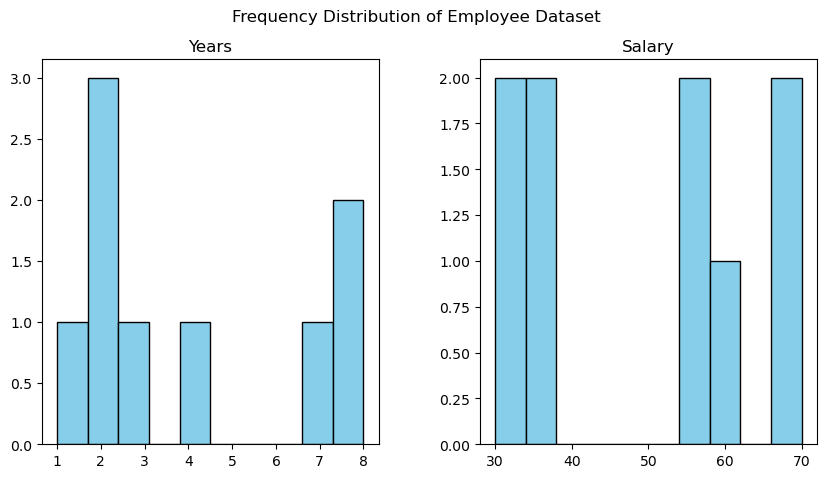

In [63]:
# Plot histograms for the 'Years' and 'Salary' columns in the df_employee DataFrame
# 'bins=10' → divide the range of values into 10 intervals (bins)
# 'grid=False' → remove the grid lines from the plot
# 'figsize=(10,5)' → set the figure size to 10 inches wide by 5 inches tall
# 'color="skyblue"' → set the fill color of the bars to light blue
# 'edgecolor="black"' → set the border color of the bars to black
df_employee.hist(column=['Years', 'Salary'], bins=10, grid=False, figsize=(10,5), color='skyblue', edgecolor='black')

# Add an overall title to the entire figure of histograms
plt.suptitle('Frequency Distribution of Employee Dataset')

# Display the plots on screen
plt.show()

#### What's the average salary in this company?

In [64]:
# Calculate the mean (average) salary from the 'Salary' column of df_employee
average_salary = df_employee['Salary'].mean()

print(f"The average salary in this company is: {average_salary:.2f}€")

The average salary in this company is: 48.89€


#### What's the highest salary?

In [65]:
# Find the highest salary in the 'Salary' column of df_employee
highest_salary = df_employee['Salary'].max()

print(f"The highest salary in this company is: {highest_salary:.2f}€")

The highest salary in this company is: 70.00€


#### What's the lowest salary?

In [67]:
# Find the lowest salary in the 'Salary' column of df_employee
lowest_salary = df_employee['Salary'].min()

print(f"The lowest salary in this company is: {lowest_salary:.2f}€")

The lowest salary in this company is: 30.00€


#### Who are the employees with the lowest salary?

In [69]:
# Filter the DataFrame to get only the employees whose salary matches the lowest salary found earlier
employees_with_lowest_salary = df_employee[df_employee['Salary'] == lowest_salary]

# Print a descriptive header
print("Employees with the lowest salary:")
print(employees_with_lowest_salary)

Employees with the lowest salary:
    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Could you give all the information about an employee called David?

In [70]:
# Filter the DataFrame to get rows where the 'Name' column is exactly 'David'
David_info = df_employee[df_employee['Name'] == 'David']

print("Information about David:")
print(David_info)

Information about David:
    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [71]:
# Filter the DataFrame to find rows where 'Name' equals 'David'
# Then select the 'Salary' column from those rows
# Use .values[0] to get the first salary value as a scalar (not a Series or array)
David_salary = df_employee[df_employee['Name'] == 'David']['Salary'].values[0]

print(f"David's salary is: {David_salary}")

David's salary is: 30


#### Print all the rows where job title is associate

In [72]:
# Filter the DataFrame to include only rows where the 'Title' column contains the word 'Associate'
# str.contains() is used for substring matching; case=False makes it case-insensitive
job_tittle_associates = df_employee[df_employee['Title'].str.contains('Associate', case=False)]

print("Employees with the job title 'Associate':")
print(job_tittle_associates)


Employees with the job title 'Associate':
     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [73]:
print(df_employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [74]:
print(df_employee[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [ ]:
# Filter df_employee to include only rows where:
# 1. The 'Title' column contains the substring 'Associate' (case-insensitive)
# 2. The 'Salary' column value is greater than 55
filtered_employees = df_employee[
    (df_employee['Title'].str.contains('Associate', case=False)) & (df_employee['Salary'] > 55)]

filtered_employees


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [77]:
# Group the DataFrame by the 'Years' column (e.g., years of experience)
# Then calculate the mean (average) of the 'Salary' column for each group
average_salary_by_years = df_employee.groupby('Years')['Salary'].mean()

average_salary_by_years

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [78]:
# Group the DataFrame by the 'Title' column (job titles)
# Calculate the mean (average) salary for each job title group
average_salary_by_title = df_employee.groupby('Title')['Salary'].mean()

average_salary_by_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

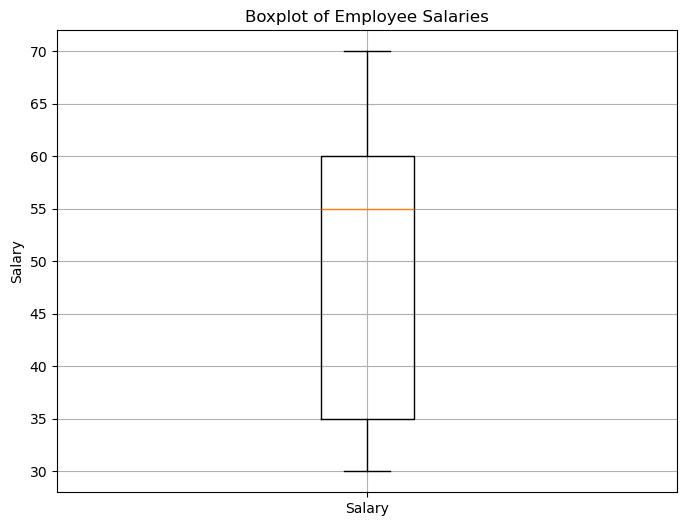

In [79]:
# Create a new figure with a size of 8 inches wide by 6 inches tall
plt.figure(figsize=(8, 6))

# Create a boxplot for the 'Salary' column of df_employee
# This visualizes the distribution, median, quartiles, and potential outliers of salaries
plt.boxplot(df_employee['Salary'])

# Add a title to the plot
plt.title('Boxplot of Employee Salaries')

# Label the y-axis with 'Salary'
plt.ylabel('Salary')

# Set custom labels on the x-axis: single tick at position 1 labeled as 'Salary'
plt.xticks([1], ['Salary'])

# Enable grid lines for easier interpretation of the plot
plt.grid(True)

# Display the plot
plt.show()


In [80]:
# Calculate the first quartile (25th percentile) of the 'Salary' column
# .quantile(0.25) returns the value below which 25% of the data falls
first_quartile = df_employee['Salary'].quantile(0.25)

print(f"The first quartile (Q1) of the salary is: {first_quartile}")

The first quartile (Q1) of the salary is: 35.0


In [81]:
# Calculate the third quartile (75th percentile) of the 'Salary' column
# .quantile(0.75) returns the value below which 75% of the data falls
third_quartile = df_employee['Salary'].quantile(0.75)

print(f"The third quartile (Q3) of the salary is: {third_quartile}")

The third quartile (Q3) of the salary is: 60.0


#### Is the mean salary per gender different?

In [82]:
# Group the DataFrame by the 'Gender' column (e.g., Male, Female)
# Calculate the mean (average) salary for each gender group
mean_salary_by_gender = df_employee.groupby('Gender')['Salary'].mean()

print(mean_salary_by_gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [84]:
# Group the DataFrame by the 'Department' column
# For each group, aggregate the 'Years' and 'Salary' columns with multiple functions: min, mean, and max
aggregated_data = df_employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],    # Minimum, average, and maximum years of experience per department
    'Salary': ['min', 'mean', 'max']    # Minimum, average, and maximum salary per department
})

print(aggregated_data)

           Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [87]:
salary_range_by_department = (
    # Group the DataFrame by the 'Department' column
    df_employee.groupby('Department')['Salary']
    # Apply an aggregate function using 'agg()'
    .agg(
        # Lambda function to calculate the difference between max and min salary in each department
        lambda x: x.max() - x.min()
    )
    # Reset the index to turn the grouped result into a DataFrame, and name the new column 'Salary Range'
    .reset_index(name='Salary Range')
)

print(salary_range_by_department)

  Department  Salary Range
0         HR            40
1         IT            40
2      Sales             0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [85]:
df_orders = pd.read_csv(r"C:\DSML bootcamp\Week4\Day1\lab-descriptive-stats-en\your-code\Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [86]:
df_orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [88]:
df_orders.info

<bound method DataFrame.info of         Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0                0     536365    85123A  2010     12    3     8   
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate  \
0        white hanging heart t-light holder         6  2010-12-01 08:26:00   
1      

####  What is the average Purchase Price?

In [92]:
# Calculate the average (mean) unit price of all orders in the 'UnitPrice' column of df_orders
average_purchase_price = df_orders['UnitPrice'].mean()

print(average_purchase_price)

3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [94]:
# Find the highest purchase price in the 'UnitPrice' column of df_orders
Highest_purchase_price = df_orders['UnitPrice'].max()

print(Highest_purchase_price)

8142.75


In [95]:
# Find the lowest purchase price in the 'UnitPrice' column of df_orders
lowest_purchase_price = df_orders['UnitPrice'].min()

lowest_purchase_price

0.0

#### Select all the customers we have in Spain

In [96]:
# Filter the DataFrame to include only rows where the 'Country' column equals 'Spain'
customers_in_spain = df_orders[df_orders['Country'] == 'Spain']

print("Customers in Spain:")
print(customers_in_spain)

Customers in Spain:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink po

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# Count how many customers are in Spain using value_counts()
spanish_customers_count = customers_in_spain['Country'].value_counts().get('Spain', 0)

print(f"There are {spanish_customers_count} customers in Spain.")

#### Select all the customers who have bought more than 50 items ?

In [97]:
# Filter the DataFrame to include only rows where the 'Quantity' column is greater than 50
customers_more_than_50_items = df_orders[df_orders['Quantity'] > 50]

print("Customers who have bought more than 50 items:")
print(customers_more_than_50_items)

Customers who have bought more than 50 items:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
46              46     536371     22086  2010     12    3     9   
83              83     536376     21733  2010     12    3     9   
96              96     536378     21212  2010     12    3     9   
102            102     536378    85071B  2010     12    3     9   
174            176     536386    85099C  2010     12    3     9   
...            ...        ...       ...   ...    ...  ...   ...   
397720      541702     581566     23404  2011     12    5    11   
397721      541703     581567     21417  2011     12    5    11   
397729      541711     581567     21326  2011     12    5    11   
397761      541746     581571     23167  2011     12    5    12   
397882      541867     581584     20832  2011     12    5    12   

                               Description  Quantity          InvoiceDate  \
46         paper chain kit 50's christmas         80  2010-12-01 09:00:0

#### Select orders from Spain that are above 50 items

In [98]:
# 1. The 'Country' column equals 'Spain'
# 2. The 'Quantity' column is greater than 50
# Both conditions are combined using the '&' operator (logical AND)
orders_spain_above_50_items = df_orders[
    (df_orders['Country'] == 'Spain') & (df_orders['Quantity'] > 50)]

print("Orders from Spain with more than 50 items:")
print(orders_spain_above_50_items)

Orders from Spain with more than 50 items:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798 

#### Select all free orders

In [99]:
# Filter the DataFrame to get orders where the 'amount_spent' is exactly zero
free_orders = df_orders[df_orders['amount_spent'] == 0]

print("Free orders:")
print(free_orders)

Free orders:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011    

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [100]:
# Filter the DataFrame to include only rows where the 'Description' column contains the phrase 'Lunch Bag'
# str.contains() performs a case-insensitive search (case=False)
# na=False ensures that rows with NaN values in 'Description' are treated as False (not matched)
lunch_bag_orders = df_orders[df_orders['Description'].str.contains('Lunch Bag', case=False, na=False)]

print("Orders that are 'Lunch Bag':")
print(lunch_bag_orders)

Orders that are 'Lunch Bag':
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172 

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [101]:
# Filter df_orders to include only rows where:
# 1. The 'year' column equals 2011
# 2. The 'Description' column contains 'Lunch Bag' (case-insensitive, ignoring NaN values)
orders_2011_lunch_bag = df_orders[
    (df_orders['year'] == 2011) & 
    (df_orders['Description'].str.contains('Lunch Bag', case=False, na=False))]

print("Orders made in 2011 that are 'Lunch Bag':")
print(orders_2011_lunch_bag)

Orders made in 2011 that are 'Lunch Bag':
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00      

#### Show the frequency distribution of the amount spent in Spain.

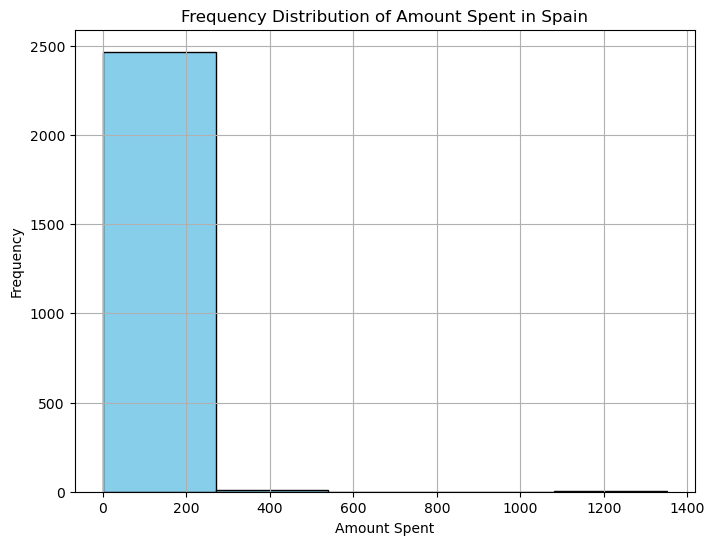

In [102]:
# Filter orders to only include those from customers in Spain
spain_orders = df_orders[df_orders['Country'] == 'Spain']

# Create a new figure for the histogram with size 8x6 inches
plt.figure(figsize=(8, 6))

# Plot a histogram of the 'amount_spent' column for Spanish orders
# bins=5 divides the data range into 5 intervals
# color='skyblue' fills the bars with light blue color
# edgecolor='black' adds black borders around the bars
plt.hist(spain_orders['amount_spent'], bins=5, color='skyblue', edgecolor='black')

# Add a title to the histogram
plt.title('Frequency Distribution of Amount Spent in Spain')

# Label the x-axis to indicate what is being measured
plt.xlabel('Amount Spent')

# Label the y-axis to indicate the frequency (count of orders per bin)
plt.ylabel('Frequency')

# Add grid lines to the plot for easier reading
plt.grid(True)

# Show the plot on screen
plt.show()


#### Select all orders made in the month of August

In [110]:
print(df_orders['month'].head())

0   1970-01-01 00:00:00.000000012
1   1970-01-01 00:00:00.000000012
2   1970-01-01 00:00:00.000000012
3   1970-01-01 00:00:00.000000012
4   1970-01-01 00:00:00.000000012
Name: month, dtype: datetime64[ns]


In [111]:
print(df_orders['month'].dtype)

datetime64[ns]


In [114]:
# Make sure the 'order_date' column is in datetime format
df_orders['month'] = pd.to_datetime(df_orders['month'])

# Filter orders where the month is August (8)
august_orders = df_orders[df_orders['month'].dt.month == 8]


print("Orders made in August:")
print(august_orders)

Orders made in August:
Empty DataFrame
Columns: [Unnamed: 0, InvoiceNo, StockCode, year, month, day, hour, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, amount_spent]
Index: []


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [106]:
# Count orders by country
orders_by_country = august_orders['Country'].value_counts()

print(orders_by_country)

Series([], Name: count, dtype: int64)


#### What's the  average amount of money spent by country

In [115]:
average_spent_by_country = df_orders.groupby('Country')['amount_spent'].mean()

print(average_spent_by_country)

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [116]:
# Find the row with the highest unit price
most_expensive_item = df_orders.loc[df_orders['UnitPrice'].idxmax()]

print("Most expensive item:")
print(most_expensive_item[['Description', 'UnitPrice']])


Most expensive item:
Description    postage
UnitPrice      8142.75
Name: 118352, dtype: object


#### What was the average amount spent per year ?

In [117]:
average_spent_per_year = df_orders.groupby('year')['amount_spent'].mean().reset_index()

print(average_spent_per_year)

   year  amount_spent
0  2010     21.892733
1  2011     22.430074
